In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Libraries 

In [ ]:
# used for working with arrays
import numpy as np 
# for creating and removing a directory (folder), 
import os
# for data analysis
import pandas as pd
# for graphs
import matplotlib.pyplot as plt
import seaborn as sns
# provides various functions that work on iterators to produce complex iterators
import itertools
# to generate random numbers
import random
# for creating static, animated, and interactive visualizations
import matplotlib.gridspec as gridspec 
#provides a selection of efficient tools for machine learning and statistical modeling
#
from sklearn.preprocessing import LabelEncoder
# To divide data in training and testing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics 

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import scikitplot.metrics as splt

After adding the necessary libraries, let's add our data set, which is divided into train and test.

In [ ]:
Dataset_PATH="/content/drive/MyDrive/AI Labs/Datasets/NSL-KDD Dataset/nsl-kdd"
file_path_20_percent = os.path.join(Dataset_PATH,'KDDTrain+_20Percent.txt') #20% subset of NSL-KDD train set
file_path_full_training_set = os.path.join(Dataset_PATH,'KDDTrain+.txt') #The complete train set of NSL-KDD
file_path_test = os.path.join(Dataset_PATH,'KDDTest+.txt')  #NSL-KDD's complete test set

df = pd.read_csv(file_path_full_training_set)
test_df = pd.read_csv(file_path_test)

Let's name the columns in our data set and understand what the data in our columns do.

In [ ]:
df.columns

Index(['0', 'tcp', 'ftp_data', 'SF', '491', '0.1', '0.2', '0.3', '0.4', '0.5',
       '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14',
       '0.15', '0.16', '0.17', '2', '2.1', '0.00', '0.00.1', '0.00.2',
       '0.00.3', '1.00', '0.00.4', '0.00.5', '150', '25', '0.17.1', '0.03',
       '0.17.2', '0.00.6', '0.00.7', '0.00.8', '0.05', '0.00.9', 'normal',
       '20'],
      dtype='object')

In [ ]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns
test_df.columns = columns

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


1. duration : The length of the connection time.
2. protocol_type : The protocol type used.
3. service : The target network service used.
4. flag : Connection status (Normal or Error).
5. src_bytes : Number of data bytes transferred from source to destination in a single connection.
6. dst_bytes : Number of data bytes transferred from destination to source in a single connection.
7. land : This variable takes the value 1 or 0 if the source IP, destination IP addresses, and port numbers are equal.
8. wrong_fragment : Total number of wrong parts in this link.
9. urgent : Number of urgent packages in this link. Emergency packets are packets with the emergency bit enabled.
10. hot : The number of "hot" indicators in the content, for example: entering the content directory, creating and executing programs.
11. num_failed_logins : The number of failed login attempts.
12. logged_in : Login status : 1 when successful, 0 when not.
13. num_compromised : The number of "Compromised/Compromised" conditions.
14. root_shell : 1 from root shell, 0 otherwise.
15. su_attempted : 1 if "su root" command was tried, 0 otherwise.
16. num_root : Number of "root" accesses or operations performed as root on the connection.
17. num_file_creations : The number of file creations on the link.
18. num_shells : The number of shell prompts.
19. num_access_files : Number of operations on access control files.
20. num_outbound_cmds : Number of outbound commands in ftp session.
21. is_host_login : Login to hot list ie 1 if admin or root, 0 otherwise.
22. is_guest_login : 1 if guest login, 0 otherwise.
23. count : Number of connections to the same destination host as the current connection in the last two seconds
24. srv_count : Number of connections (port number) to the same service as the current connection in the last two seconds.
25. serror_rate : Percentage of connections that enable s0,s1,s2 or s3 flag(4) among connections collected in Count(23).
26. srv_serror_rate : Percentage of connections that enable s0, s1, s2 or s3 flag(4) among connections collected in srv_coun(24).
27. error_rate : Percentage of connections that have REJ flag(4) enabled among connections collected in Count(23).
28. srv_rerror_rate : Percentage of connections that have REJ flag(4) enabled among connections collected in srv_count(24).
29. same_srv_rate : Percentage of connections that are the same service among connections collected in Count(23).
30. diff_srv_rate : Percentage of connections with different services among connections collected in Count(23).
31. srv_diff_host_rate : Percentage of connections to different target machines among connections collected in srv_count (24).
32. dst_host_count : The number of connections with the same destination host IP address.
33. dst_host_srv_count : The number of connections with the same port number.
34. dst_host_same_srv_rate : Percentage of connections that are the same service among connections collected in dst_host_count (32).
35. dst_host_diff_srv_rate : Percentage of connections to different services among connections collected in dst_host_count (32).
36. dst_host_same_src_port_rate : Percentage of connections to the same source port among connections collected in dst_host_srv_count (33)
37. dst_host_srv_diff_host_rate : Percentage of connections to different target machines among connections collected in dst_host_srv_count(33).
38. dst_host_serror_rate : The percentage of connections that have enabled the s0, s1, s2 or s3 flag(4) among connections collected in dst_host_count (32).
39. dst_host_srv_serror_rate : Percentage of connections that enable s0, s1, s2 or s3 flag(4) among connections collected in dst_host_srv_count (33).
40. dst_host_rerror_rate : Percentage of connections that have REJ flag(4) enabled among connections collected in dst_host_count (32).
41. dst_host_srv_rerror_rate : Percentage of connections that have REJ flag(4) enabled among connections collected in dst_host_srv_count(33)
42. attack: Types of attacks.
43. level : Difficulty level.

EDA (Exploratory data analysis)

In [ ]:
df.describe() #Let's display the values of the attributes in our data set, such as min, max, standard deviation.

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [ ]:
df.info() #Let's check the data types of the attributes in our data and whether they are null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [ ]:
# Quick overview of dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [ ]:
df.nunique() # tells number of unique instance

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [ ]:
test_df.nunique()

duration                        624
protocol_type                     3
service                          64
flag                             11
src_bytes                      1149
dst_bytes                      3650
land                              2
wrong_fragment                    3
urgent                            4
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_root                         20
num_file_creations                9
num_shells                        4
num_access_files                  5
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           495
srv_count                       457
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate             

We have 4 categorical variables in our data type and we have no null values.

,Missing Records,Percentage (%)
duration,0,0.0
protocol_type,0,0.0
service,0,0.0
flag,0,0.0
src_bytes,0,0.0
dst_bytes,0,0.0
land,0,0.0
wrong_fragment,0,0.0
urgent,0,0.0
hot,0,0.0


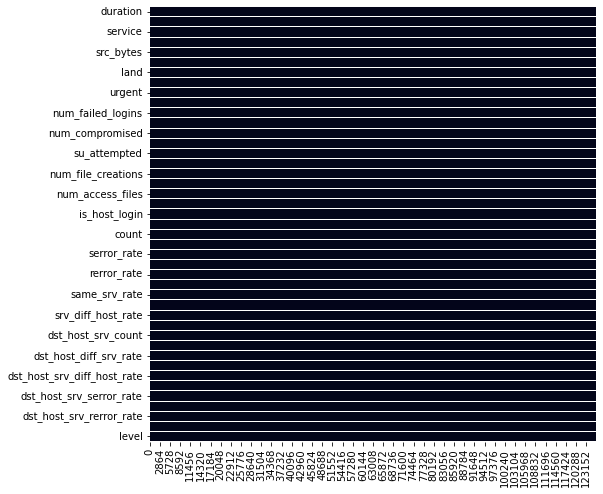

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(pd.isnull(df.T), cbar=False) 

pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/len(df)], 
              axis=1).rename(columns={0:'Missing Records', 1:'Percentage (%)'})

In [ ]:
# Histogram
def plot_hist(df, cols, title):
    grid = gridspec.GridSpec(10, 2, wspace=0.5, hspace=0.5) 
    fig = plt.figure(figsize=(15,25)) 
    
    for n, col in enumerate(df[cols]):         
        ax = plt.subplot(grid[n]) 

        ax.hist(df[col], bins=20) 
        #ax.set_ylabel('Count', fontsize=12)
        ax.set_title(f'{col} distribution', fontsize=15) 
    
    fig.suptitle(title, fontsize=20)
    grid.tight_layout(fig, rect=[0, 0, 1, 0.97])
    plt.show()

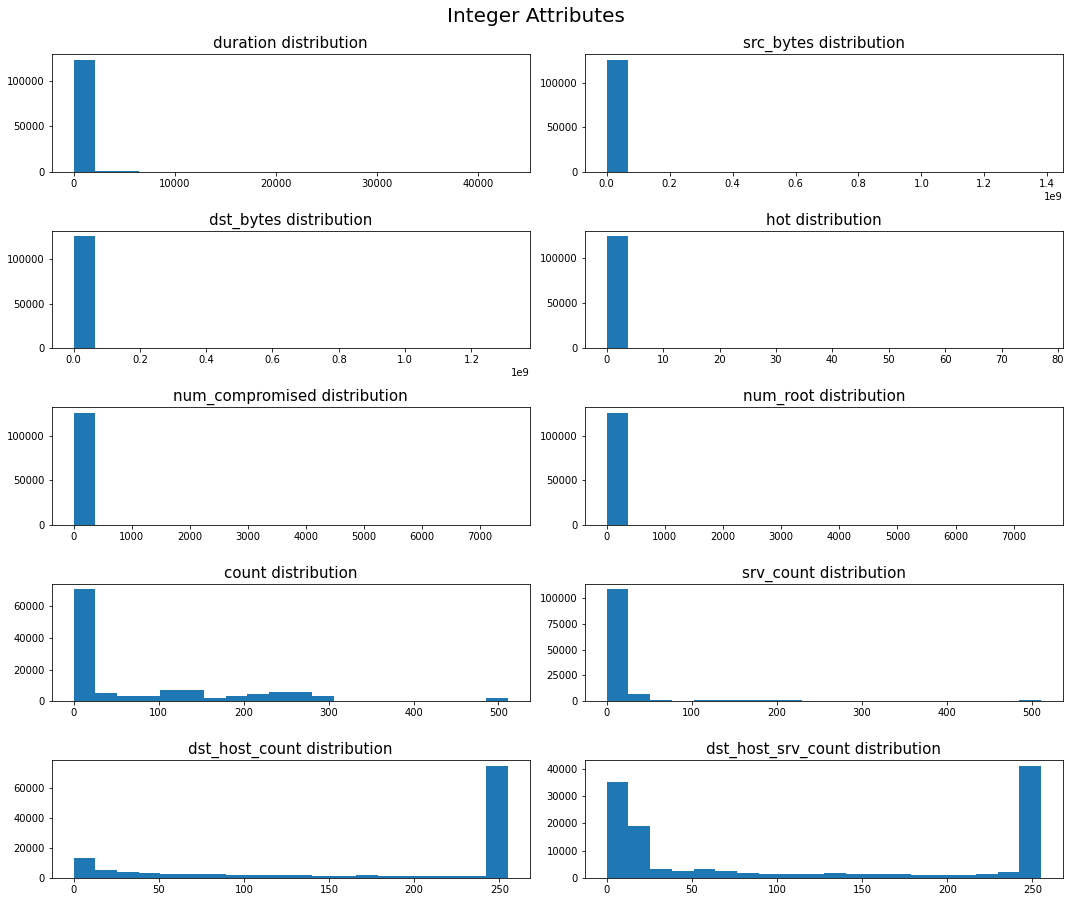

In [ ]:
hist_cols = [ 'duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count']
    
plot_hist(df, hist_cols, 'Integer Attributes')

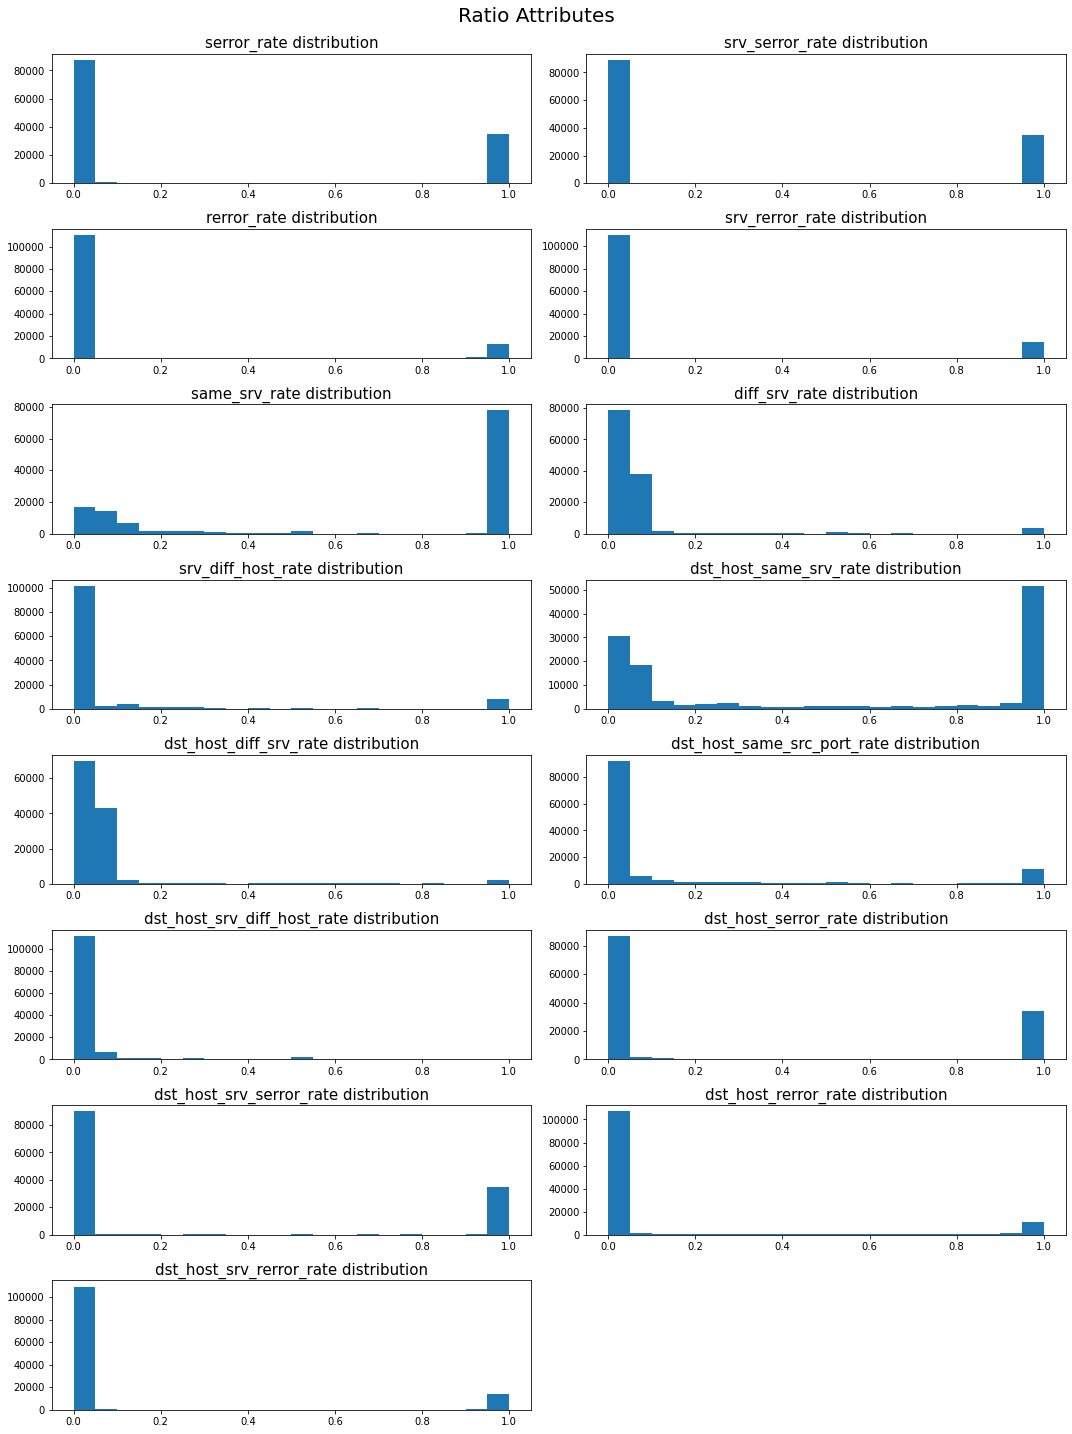

In [ ]:
rate_cols = [ 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

plot_hist(df, rate_cols, 'Ratio Attributes')

We displayed the distributions of the features in our dataset.

In [ ]:
is_attack = df.attack.map(lambda a: 0 if a == 'normal' else 1)
test_attack = test_df.attack.map(lambda a: 0 if a == 'normal' else 1)

df['attack_state'] = is_attack
test_df['attack_state'] = test_attack

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1


Let's see our categorical attack column numerically by creating the attak_state column, where we will show the attack states as 1 and the non-attack states as 0. Thus, we can see how much attack data we have and how much normal data we have.

In [ ]:
(df.attack_state == 1).sum()/len(df) #We have about 46% attacks in our Train dataset.

0.4654208871812784

In [ ]:
(test_df.attack_state == 1).sum()/len(df) #We have about 10% attacks in our test dataset.

0.10186390626488426

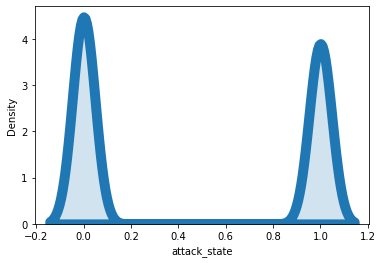

In [ ]:
sns.kdeplot(
   data=df, x="attack_state",
   fill=True, common_norm=False, palette="crest",
   alpha=.2, linewidth=10,
)

In [ ]:
AtakSayısı = (df.attack_state == 1).sum()
AtakOlmayanDurumSayısı = (df.attack_state == 0).sum()
myData = [AtakSayısı , AtakOlmayanDurumSayısı]

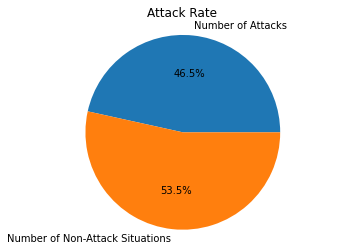

In [ ]:
my_labels = 'Number of Attacks','Number of Non-Attack Situations'
plt.pie(myData,labels=my_labels,autopct='%1.1f%%')
plt.title('Attack Rate')
plt.axis('equal')
plt.show()

Let's create the classes in which attacks contain sub-attack types.
*  In our data set, there are 11 sub-attack types that we will collect under the DoS/DDoS attack class, 6 under the Probe attack class, 7 under the User to Root(U2R) attack class, and 15 sub-attack types that we will collect under the Remote to Local (R2L) attack class.


In [ ]:
DoS_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
Probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
U2R = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
R2L = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

attack_labels = ['Normal','DoS','Probe','U2R','R2L']

def class_attack(attack):
    if attack in DoS_attacks:
        attack_type = 1
    elif attack in Probe_attacks:
        attack_type = 2
    elif attack in U2R:
        attack_type = 3
    elif attack in R2L:
        attack_type = 4
    else:
        attack_type = 0       
    return attack_type

#We create the attack_class column and add it to our dataset.
#Below this column are the numerical equivalents of the classes of our attacks.
attack_class = df.attack.apply(class_attack)
df['attack_class'] = attack_class

test_attack_class = test_df.attack.apply(class_attack)
test_df['attack_class'] = test_attack_class

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state,attack_class
0,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1,1


In [ ]:
df.tail() #Let's view the last 5 rows of our dataset.

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state,attack_class
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20,1,1
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.01,0.0,0.00,0.0,0.00,0.0,normal,21,0,0
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.00,0.0,0.72,0.0,0.01,0.0,normal,18,0,0
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20,1,1
125971,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,0.30,0.0,0.00,0.0,0.00,0.0,normal,21,0,0


Let's get to know our data by visualizing our dataset.

In [ ]:
Normal = (df.attack_class == 0).sum()/len(df)
print('Normal = ' , Normal)
DoSDDoS = (df.attack_class == 1).sum()/len(df)
print('DoS/DDoS = ' , DoSDDoS)
Probe = (df.attack_class == 2).sum()/len(df)
print("Probe = " , Probe )
U2R = (df.attack_class == 3).sum()/len(df)
print('U2R = ', U2R)
R2L = (df.attack_class == 4).sum()/len(df)
print('R2L = ' ,R2L)

Normal =  0.5346505572666942
DoS/DDoS =  0.3645810180040009
Probe =  0.09252849839646905
U2R =  0.00034134569586892325
R2L =  0.007898580636966945


In [ ]:
Normal = (test_df.attack_class == 0).sum()/len(test_df)
print('Normal = ' , Normal)
DoSDDoS = (test_df.attack_class == 1).sum()/len(test_df)
print('DoS/DDoS = ' , DoSDDoS)
Probe = (test_df.attack_class == 2).sum()/len(test_df)
print("Probe = " , Probe )
U2R = (test_df.attack_class == 3).sum()/len(test_df)
print('U2R = ', U2R)
R2L = (test_df.attack_class == 4).sum()/len(test_df)
print('R2L = ' ,R2L)

Normal =  0.43716453000931554
DoS/DDoS =  0.3308787650268376
Probe =  0.10739475668721998
U2R =  0.0028833784323293262
R2L =  0.12167856984429756


Let's see the distribution of attack types within our attack classes.

In [ ]:
attack_vs_class = pd.crosstab(df.attack_class, df.attack)
attack_vs_class

attack,back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,...,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster
attack_class,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,9,0,0,...,0,0,0,0,0,0,0,0,0,0
1,956,0,0,0,0,0,18,0,0,41214,...,0,201,0,0,0,2646,0,892,0,0
2,0,0,0,0,0,3599,0,0,0,0,...,0,0,2931,0,3633,0,0,0,0,0
3,0,30,0,0,0,0,0,0,0,0,...,0,0,0,10,0,0,0,0,0,0
4,0,0,8,53,11,0,0,0,7,0,...,4,0,0,0,0,0,2,0,890,20


In [ ]:
attack_vs_DDoS = pd.crosstab(df.attack_class == 1, df.attack)
attack_vs_DDoS

attack,back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,...,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster
attack_class,,,,,,,,,,,,,,,,,,,,,
False,0,30,8,53,11,3599,0,9,7,0,...,4,0,2931,10,3633,0,2,0,890,20
True,956,0,0,0,0,0,18,0,0,41214,...,0,201,0,0,0,2646,0,892,0,0


In our study, we see the attack types that are included in the DDoS attacks that we will investigate.

Let's visualize the distributions.

In [ ]:
def bake_pies(data_list,labels):
    list_length = len(data_list)
    
    # setup for mapping colors
    color_list = sns.color_palette()
    color_cycle = itertools.cycle(color_list)
    cdict = {}
    
    # build the subplots
    fig, axs = plt.subplots(1, list_length,figsize=(18,10), tight_layout=False)
    plt.subplots_adjust(wspace=1/list_length)
    
    # loop through the data sets and build the charts
    for count, data_set in enumerate(data_list): 
        
        # update our color mapt with new values
        for num, value in enumerate(np.unique(data_set.index)):
            if value not in cdict:
                cdict[value] = next(color_cycle)
       
        # build the wedges
        wedges,texts = axs[count].pie(data_set,
                           colors=[cdict[v] for v in data_set.index])

        # build the legend
        axs[count].legend(wedges, data_set.index,
                           title="Durum",
                           loc="center left",
                           bbox_to_anchor=(1, 0, 0.5, 1))
        # set the title
        axs[count].set_title(labels[count])
        
    return axs 

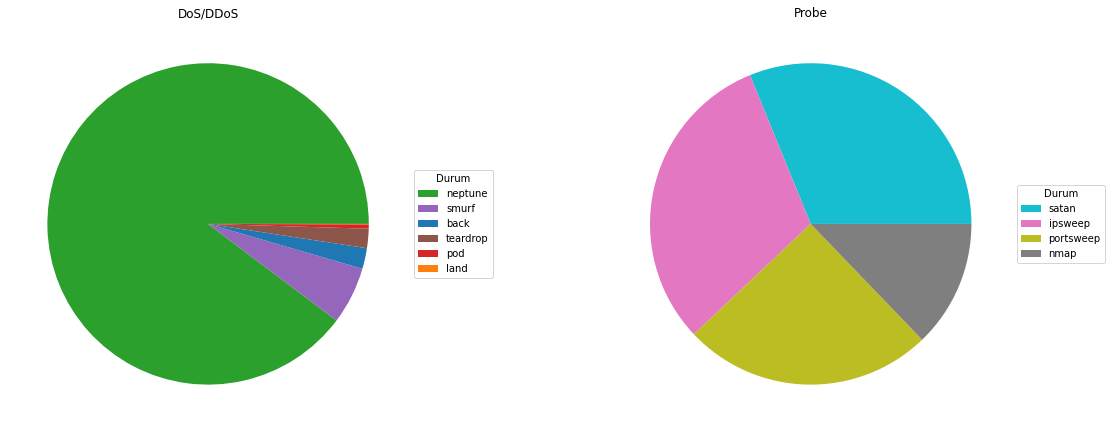

In [ ]:
#normal_class = df.loc[df.attack_class == 0].attack.value_counts()
DoSDDoS_class = df.loc[df.attack_class == 1].attack.value_counts()
probe_class = df.loc[df.attack_class == 2].attack.value_counts()


flag_axs = bake_pies([DoSDDoS_class , probe_class], ['DoS/DDoS','Probe'])        
plt.show()

We have added 11 different attack types into the DDoS attacks class. We see in our pie chart that there are only 6 of these attacks in the data set we use.

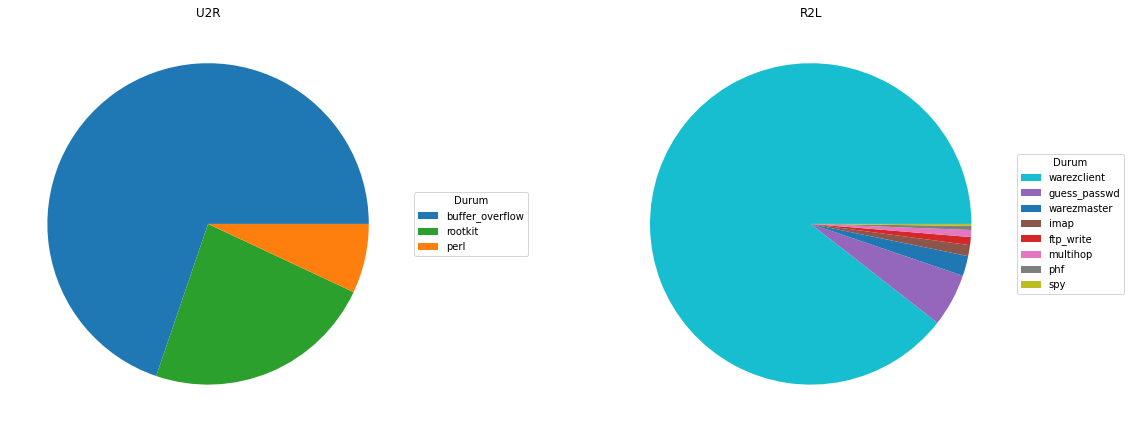

In [ ]:
U2R_class = df.loc[df.attack_class == 3].attack.value_counts()
R2L_class = df.loc[df.attack_class == 4].attack.value_counts()

flag_axs = bake_pies([U2R_class,R2L_class], ['U2R','R2L'])        
plt.show()

Let's view the distribution of our general attack classes.

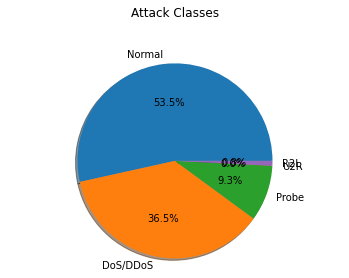

In [ ]:
Normal = (df.attack_class == 0).sum()
DoSDDoS = (df.attack_class == 1).sum()
Probe = (df.attack_class == 2).sum()
U2R = (df.attack_class == 3).sum()
R2L = (df.attack_class == 4).sum()
myData = [Normal , DoSDDoS,Probe,U2R,R2L]

my_labels = 'Normal','DoS/DDoS' ,'Probe' ,'U2R' , 'R2L'
plt.pie(myData,labels=my_labels ,autopct='%1.1f%%' , shadow = True)
plt.title('Attack Classes\n\n')
plt.axis('equal')
plt.show()

As can be seen in the pie chart, in our dataset, where U2R and R2L attacks are very rare, DoS/DDoS attacks have the highest rate of 36%. This shows that our dataset is directly proportional to today's internet traffic attacks.

In our study, we will choose attack_class = 1, that is, DoS/DDoS attacks as the target variable.

In [ ]:
attack_vs_protocol = pd.crosstab((df.attack_class == 1), df.protocol_type)
attack_vs_protocol


protocol_type,icmp,tcp,udp
attack_class,,,
False,5444,60500,14101
True,2847,42188,892


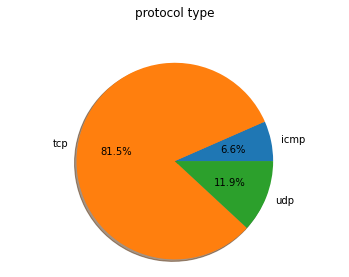

In [ ]:
icmp = attack_vs_protocol.icmp.sum()
tcp = attack_vs_protocol.tcp.sum()
udp = attack_vs_protocol.udp.sum()
myData = [icmp , tcp,udp]
my_labels = 'icmp','tcp' ,'udp' 
plt.pie(myData,labels=my_labels ,autopct='%1.1f%%' , shadow = True)
plt.title('protocol type\n\n')
plt.axis('equal')
plt.show()


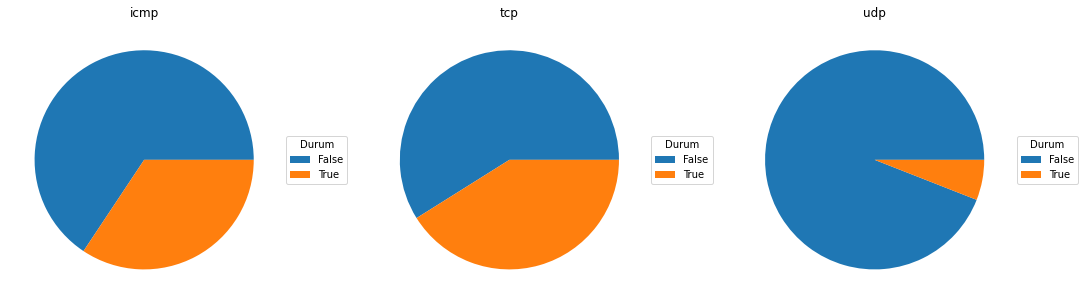

In [ ]:
icmp_attacks = attack_vs_protocol.icmp
tcp_attacks = attack_vs_protocol.tcp
udp_attacks = attack_vs_protocol.udp


bake_pies([icmp_attacks, tcp_attacks, udp_attacks],['icmp','tcp','udp'])
plt.show()

There are types of DDoS attack. These are;
1. Volume Based DDoS Attack: By manipulation of UDP and SYN packets
2. Protocol Based DDoS Attack: With vulnerabilities on TCP/IP and OSI packets
3. Flood DDoS Attack
    * Ping Flood DDoS Attack: Via ICMP protocol
    * SYN Flood DDoS Attack: With TCP/IP manipulation
    * UDP Flood DDoS Attack
is in the form.

In the charts and tables above, we see the distribution of protocol types in DDoS attacks in our data.


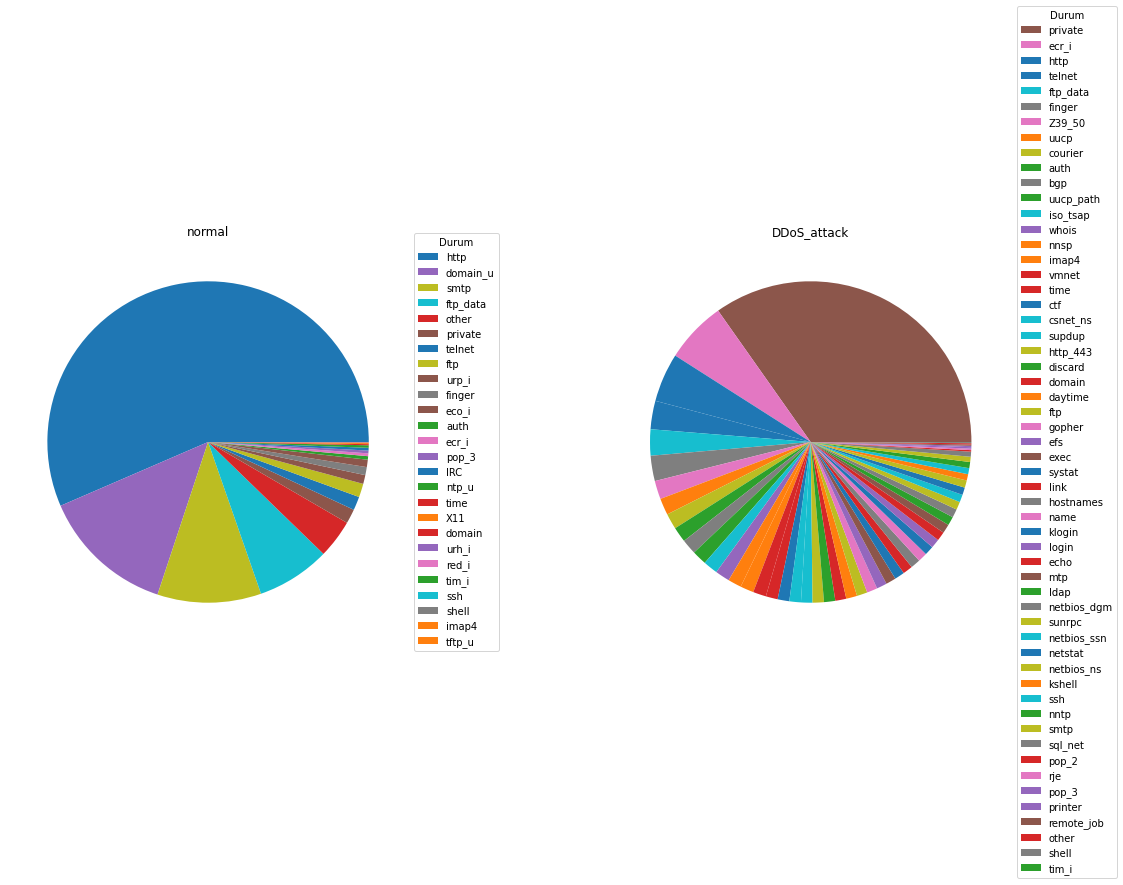

In [ ]:

normal_services = df.loc[df.attack_class == 0].service.value_counts()
DDoS_attack_services = df.loc[df.attack_class == 1].service.value_counts()


service_axs = bake_pies([normal_services, DDoS_attack_services], ['normal','DDoS_attack'])        
plt.show()

In [ ]:
service_vs_protocol = pd.crosstab(df.service, df.protocol_type,)
service_vs_protocol

protocol_type,icmp,tcp,udp
service,,,
IRC,0,187,0
X11,0,73,0
Z39_50,0,862,0
aol,0,2,0
auth,0,955,0
...,...,...,...
urp_i,602,0,0
uucp,0,780,0
uucp_path,0,689,0


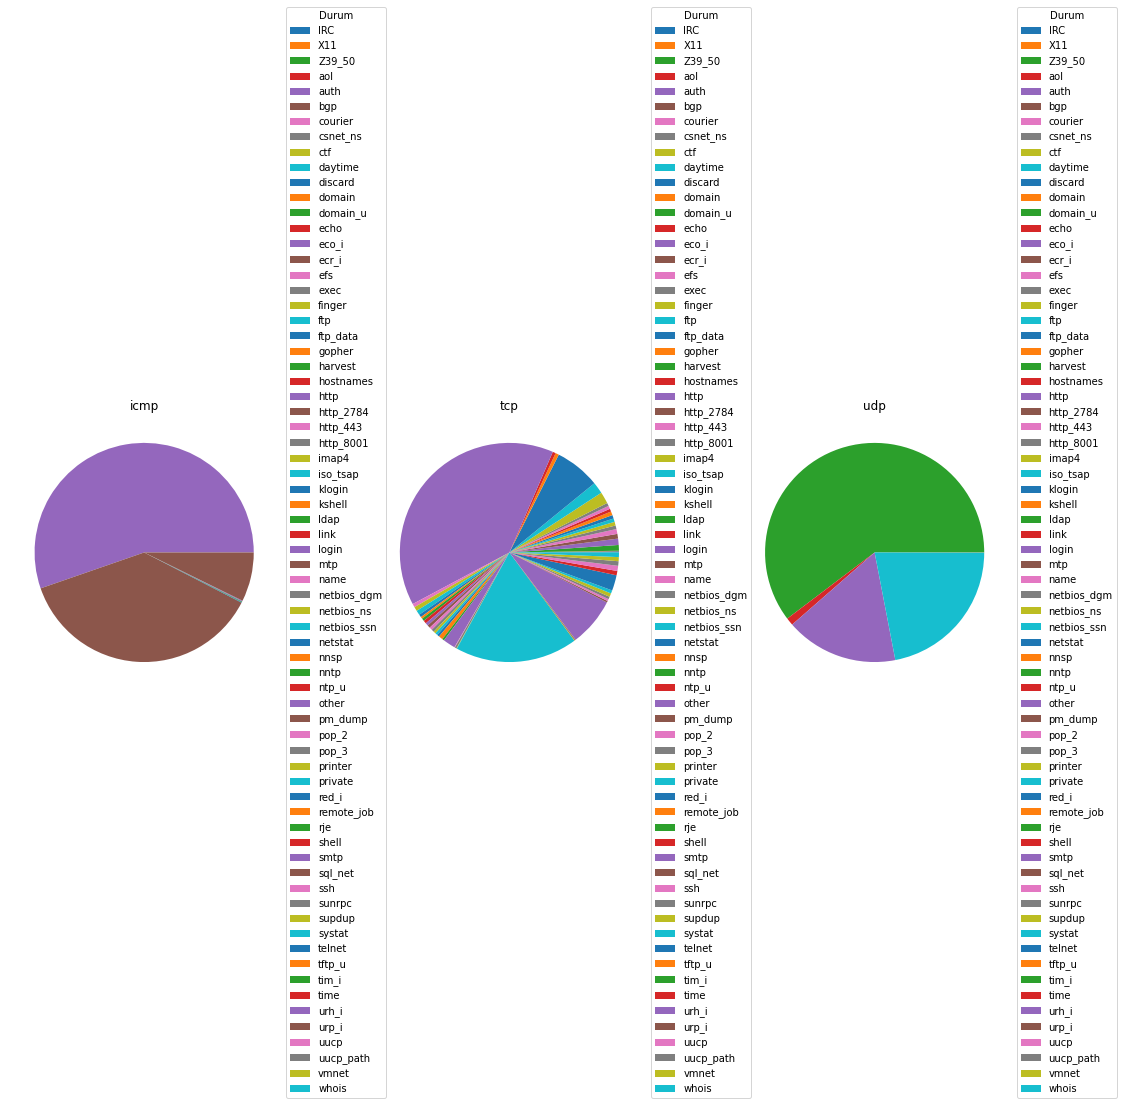

In [ ]:
icmp_service = service_vs_protocol.icmp
tcp_service = service_vs_protocol.tcp
udp_service = service_vs_protocol.udp

# create the charts
bake_pies([icmp_service, tcp_service, udp_service],['icmp','tcp','udp'])
plt.show()

Let's visualize to get to know the other attributes in our dataset better.

# DATA ENCODING

Now, let's clear our data from categorical variables with the help of label encoder.

In [ ]:
df = pd.get_dummies(df,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

In [ ]:
test_df = pd.get_dummies(test_df,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

We replaced categorical variables with integer values. Now let's view our dataset as it is.

In [ ]:
df.head() 

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
test_df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,12983,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,15,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,267,14515,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


Now we can delete the columns with our categorical variables.

In [ ]:
drop_cols = ['attack' ]  
df.drop(drop_cols, axis=1, inplace=True)    

In [ ]:
drop_cols = ['attack' ]  
test_df.drop(drop_cols, axis=1, inplace=True)    

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Columns: 125 entries, duration to SH
dtypes: float64(15), int64(26), uint8(84)
memory usage: 49.5 MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Columns: 119 entries, duration to SH
dtypes: float64(15), int64(26), uint8(78)
memory usage: 8.7 MB


We see that there are no categorical variables left in our data.

# FEATURE SELECTION


In [ ]:
normal = df[df.attack_class == 0]

In [ ]:
normal_test= test_df[test_df.attack_class == 0]

In [ ]:
DDoS = df[df.attack_class == 1]

In [ ]:
DDoS_test= test_df[test_df.attack_class == 1 ]

In [ ]:
total_data = pd.concat([normal, DDoS], ignore_index=True)

In [ ]:
total_data_test = pd.concat([normal_test, DDoS_test], ignore_index=True)

In [ ]:
total_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,287,2251,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,300,13788,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
113274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
113275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
113276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
total_data_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,2,12983,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,267,14515,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1022,387,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,327,467,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,616,330,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17309,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
17310,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
17311,1,2599,293,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
17312,0,1032,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
corr= total_data.corr()
corr_y = abs(corr['attack_class'])
highest_corr = corr_y[corr_y > 0.1]
highest_corr.sort_values(ascending=True)

uucp                           0.100117
RSTO                           0.101961
ftp_data                       0.103014
Z39_50                         0.105358
icmp                           0.111136
wrong_fragment                 0.114329
dst_host_diff_srv_rate         0.120568
other                          0.121218
diff_srv_rate                  0.148637
dst_host_same_src_port_rate    0.152444
REJ                            0.156761
tcp                            0.166673
ecr_i                          0.179735
rerror_rate                    0.188424
srv_rerror_rate                0.189330
dst_host_srv_rerror_rate       0.189395
dst_host_rerror_rate           0.195263
smtp                           0.198570
dst_host_srv_diff_host_rate    0.209941
domain_u                       0.243095
udp                            0.251740
srv_diff_host_rate             0.269118
level                          0.291393
private                        0.458538
dst_host_count                 0.499389


In [ ]:
corr= total_data_test.corr()
corr_y = abs(corr['attack_class'])
highest_corr_test = corr_y[corr_y >0.1]
highest_corr_test.sort_values(ascending=True)

tcp                            0.129309
S3                             0.133760
diff_srv_rate                  0.144034
duration                       0.165151
RSTO                           0.169658
dst_host_srv_diff_host_rate    0.180977
RSTR                           0.184177
dst_host_diff_srv_rate         0.189095
level                          0.199219
icmp                           0.201125
domain_u                       0.202760
ecr_i                          0.216899
telnet                         0.236645
srv_diff_host_rate             0.269138
udp                            0.290055
private                        0.364017
S0                             0.388486
srv_serror_rate                0.413560
serror_rate                    0.414029
dst_host_serror_rate           0.415862
dst_host_srv_serror_rate       0.426524
count                          0.449259
REJ                            0.471252
dst_host_count                 0.505173
http                           0.516853


In [ ]:
highest_corr_columns= highest_corr.index

In [ ]:
highest_corr_test_columns= highest_corr_test.index

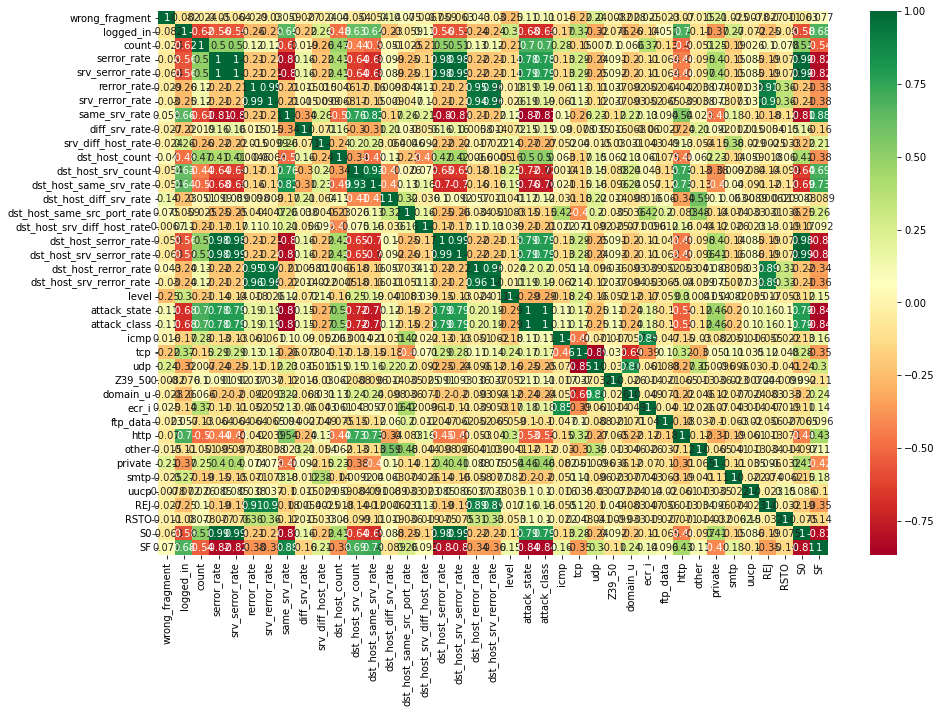

In [ ]:
plt.figure(figsize=(15,10))
g=sns.heatmap(total_data[highest_corr.index].corr(),annot=True,cmap="RdYlGn")

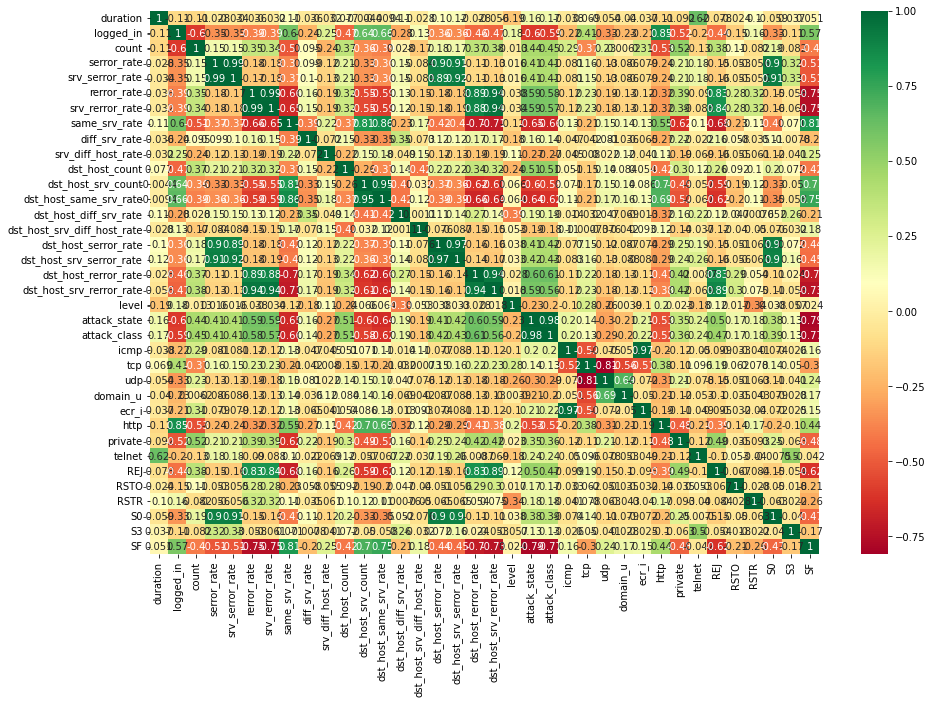

In [ ]:
plt.figure(figsize=(15,10))
g=sns.heatmap(total_data_test[highest_corr_test.index].corr(),annot=True,cmap="RdYlGn")

We have displayed the attributes most associated with DDoS attacks in the correlation matrix and heat map. Now let's train our dataset by deleting the attributes other than these attributes.

In [ ]:
drop_cols = df.loc[:,[i for i in list(df.columns) if i not in [
'diff_srv_rate',                
'dst_host_same_src_port_rate', 
'REJ',
'tcp',                            
'ecr_i',                         
'rerror_rate',                    
'srv_rerror_rate',                
'dst_host_srv_rerror_rate',       
'dst_host_rerror_rate',           
'smtp',                           
'dst_host_srv_diff_host_rate',    
'domain_u',                       
'udp',                            
'srv_diff_host_rate',             
'private',                        
'dst_host_count',                 
'http',                           
'logged_in',                      
'count',
'dst_host_srv_count',             
'dst_host_same_srv_rate',         
'serror_rate',                    
'srv_serror_rate',                
'dst_host_serror_rate',           
'S0',                             
'dst_host_srv_serror_rate',       
'SF',                             
'same_srv_rate',                 
'attack_state',                  
'attack_class', 
'other',
'icmp',                         
'wrong_fragment',               
'dst_host_diff_srv_rate',   
'RSTO',
'ftp_data',
'Z39_50',
'uucp'                          
]]]

In [ ]:
#drop_cols = ['wrong_fragment','duration','src_bytes','dst_bytes','land','urgent','hot','num_failed_logins','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','srv_count']  
df.drop(drop_cols, axis=1, inplace=True)  
df

,wrong_fragment,logged_in,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,...,ftp_data,http,other,private,smtp,uucp,REJ,RSTO,S0,SF
0,0,0,13,0.0,0.0,0.0,0.0,0.08,0.15,0.00,...,0,0,1,0,0,0,0,0,0,1
1,0,0,123,1.0,1.0,0.0,0.0,0.05,0.07,0.00,...,0,0,0,1,0,0,0,0,1,0
2,0,1,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,...,0,1,0,0,0,0,0,0,0,1
3,0,1,30,0.0,0.0,0.0,0.0,1.00,0.00,0.09,...,0,1,0,0,0,0,0,0,0,1
4,0,0,121,0.0,0.0,1.0,1.0,0.16,0.06,0.00,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,0,184,1.0,1.0,0.0,0.0,0.14,0.06,0.00,...,0,0,0,1,0,0,0,0,1,0
125968,0,0,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,...,0,0,0,1,0,0,0,0,0,1
125969,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,...,0,0,0,0,1,0,0,0,0,1
125970,0,0,144,1.0,1.0,0.0,0.0,0.06,0.05,0.00,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
drop_cols1 = test_df.loc[:,[i for i in list(test_df.columns) if i not in [
'diff_srv_rate',                
'dst_host_same_src_port_rate', 
'REJ',
'tcp',                            
'ecr_i',                         
'rerror_rate',                    
'srv_rerror_rate',                
'dst_host_srv_rerror_rate',       
'dst_host_rerror_rate',           
'smtp',                           
'dst_host_srv_diff_host_rate',    
'domain_u',                       
'udp',                            
'srv_diff_host_rate',             
'private',                        
'dst_host_count',                 
'http',                           
'logged_in',                      
'count',                          
'dst_host_srv_count',             
'dst_host_same_srv_rate',         
'serror_rate',                    
'srv_serror_rate',                
'dst_host_serror_rate',           
'S0',                             
'dst_host_srv_serror_rate',       
'SF',                             
'same_srv_rate',                 
'attack_state',                 
'attack_class', 
'other',
'icmp',                         
'wrong_fragment',               
'dst_host_diff_srv_rate',   
'RSTO',
'ftp_data',
'Z39_50',
'uucp'
]]]


In [ ]:
#drop_cols = ['src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','srv_count' ,'dst_host_same_src_port_rate']  
test_df.drop(drop_cols1, axis=1, inplace=True)  
test_df

,wrong_fragment,logged_in,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,...,ftp_data,http,other,private,smtp,uucp,REJ,RSTO,S0,SF
0,0,0,136,0.0,0.00,1.0,1.0,0.01,0.06,0.00,...,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,...,1,0,0,0,0,0,0,0,0,1
2,0,0,1,0.0,0.00,0.0,0.0,1.00,0.00,1.00,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0.0,0.12,1.0,0.5,1.00,0.00,0.75,...,0,0,0,0,0,0,0,1,0,0
4,0,1,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,...,0,0,0,0,1,0,0,0,0,1
22539,0,1,2,0.0,0.00,0.0,0.0,1.00,0.00,0.18,...,0,1,0,0,0,0,0,0,0,1
22540,0,1,5,0.0,0.00,0.0,0.0,1.00,0.00,0.20,...,0,1,0,0,0,0,0,0,0,1
22541,0,0,4,0.0,0.00,0.0,0.0,1.00,0.00,0.33,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data = df.copy()

In [ ]:
test_data = test_df.copy()

In [ ]:
X_train=data.loc[:, data.columns != "attack_class"]
y_train=data['attack_class']
X_test=test_data.loc[:, test_data.columns != "attack_class"]
y_test=test_data['attack_class']

# CLASSIFICATION WITH NORMALIZATION

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train) 
X_test= mms.transform(X_test)

**DECISION TREE**

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
dt_pred = clf.predict(X_test)
# print("Accuracy:",metrics.accuracy_score(y_test, dt_pred))
acc1 = accuracy_score(y_test ,dt_pred)
pre = precision_score(y_test ,dt_pred,average='weighted',labels=np.unique(dt_pred))
rec = recall_score(y_test ,dt_pred,average='weighted')
f1 = f1_score(y_test ,dt_pred,average='weighted')
print('ACCURACY : ',acc1)
print('PRECISON : ',pre)
print('RECALL : ',rec)
print('F1_SCORE : ',f1)

ACCURACY :  0.8851971787251032
PRECISON :  0.9280476950405583
RECALL :  0.8851971787251032
F1_SCORE :  0.8944373433920509


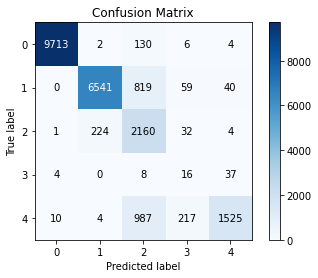

In [ ]:
splt.plot_confusion_matrix(y_test, dt_pred)

In [ ]:
print(classification_report(y_test, dt_pred)) # A value of 1 here gives attack_class == 1, that is, DDoS attacks.

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9855
           1       0.97      0.88      0.92      7459
           2       0.53      0.89      0.66      2421
           3       0.05      0.25      0.08        65
           4       0.95      0.56      0.70      2743

    accuracy                           0.89     22543
   macro avg       0.70      0.71      0.67     22543
weighted avg       0.93      0.89      0.89     22543

